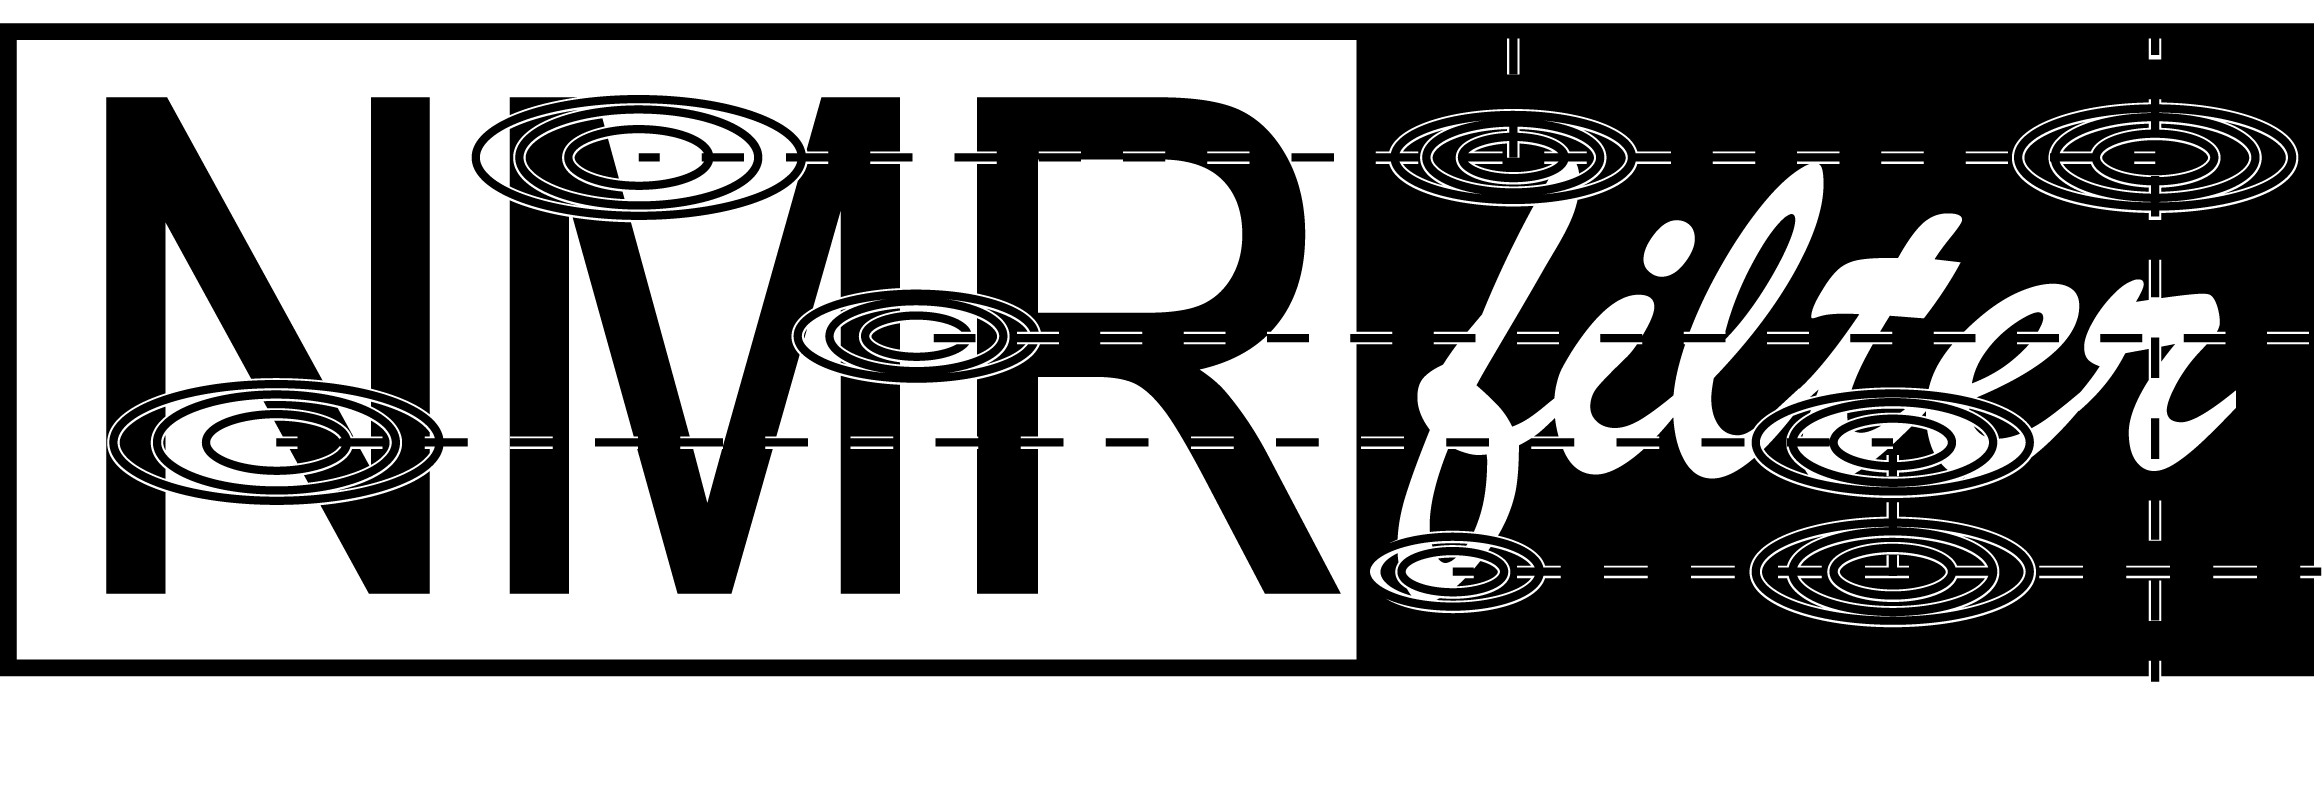

# Run NMRfilter

Navegate to the NMRfilter directory to proceed with instalations according to https://github.com/stefhk3/nmrfilter
- The program is stored in a directory named nmrfilter
- Projects are stored in different directories [projectFOLDER] within __a main directory__ (e.g. nmrfilterprojects) in the same level to nmrfilter. 
    - This path should be set at the __nmrproc.properties file__ together with input parameters.
- Once this is set, you can run the following code, chosing your project from the dropdown.

In [15]:
# Import Dependencies
import pandas as pd # Dataframes yield better visualizations of tables
import configparser
import configparser
import os
import subprocess
import sys
from clustering import *
from clusterlouvain import *
from similarity import *
from nmrutil import *
import ipywidgets as widgets

In [16]:
# Select Project Master-Directory
cp = readprops()
datapath=cp.get('datadir')
projects = [f for f in os.listdir(datapath) if os.path.isdir(os.path.join(datapath, f))]
menu = widgets.Dropdown(
       options=projects,
       description='Chose your project:',
       style={'description_width': 'initial'})
menu

Dropdown(description='Chose your project:', options=('artificialwHMBC_DL', 'dadosMJCOLMARloose_DL', 'pbolduswi…

In [17]:
project = menu.value
print(f'Project = {project}')
checkprojectdir(datapath, project, cp)
pd.DataFrame.from_dict(cp, orient='index', columns=["inputs from properties"])
# if needed, please, modify the file nmrproc.properties from the main nmrfilter directory

Project = artificialwHMBC_DL


,inputs from properties
datadir,/home/shk3/git/nmrfilterprojects
msmsinput,testall.smi
predictionoutput,resultprediction.csv
result,result.txt
solvent,Methanol-D4 (CD3OD)
tolerancec,0.2
toleranceh,0.02
spectruminput,realspectrum.csv
clusteringoutput,cluster.txt
rberresolution,.2


In [18]:
# need to instal cirpy (pip install cirpy) 
# and pubchempy (pip install pubchempy) 
# and torch (pip install torch) 

In [19]:
! java -cp "./*" uk.ac.dmu.simulate.Convert $project
sdf=cp.get("msmsinput")[0:-4]+".sdf"
if cp.get('usedeeplearning'):
    try:
        os.chdir('respredict')
        import predict as respredict
        respredict.predict(filename=datapath+os.sep+project+os.sep+sdf, format="sdf", nuc="13C", sanitize="True", addhs="False", output=datapath+os.sep+project+os.sep+"predc.json", model_meta_filename=None, model_checkpoint_filename=None)
        respredict.predict(filename=datapath+os.sep+project+os.sep+sdf, format="sdf", nuc="1H", sanitize="True", addhs="False", output=datapath+os.sep+project+os.sep+"predh.json", model_meta_filename=None, model_checkpoint_filename=None)
    finally:
        os.chdir('..')
! java -cp "./*" uk.ac.dmu.simulate.Simulate $project

true_testall.sdf_/home/shk3/git/nmrfilterprojects/org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.o

org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement

org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement

org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement

org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement not included in bounds calculation
org.openscience.cdk.renderer.elements.Bounds WARN: class org.openscience.cdk.renderer.elements.AtomSymbolElement

In [20]:
# Running steps within NMRfilter

print("Clustering the peaks in the measured spectrum...")
cluster2dspectrum(cp, project)
print("Detecting communities in the measures spectrum...")
cluster2dspectrumlouvain(cp, project)
print("Calculating best hits in your compounds...")
similarity(cp, project)

# STEFAN, can we produce this result data as a variable to show it as a Dataframe (the same way I did with the nmrproc.properties above)?

Clustering the peaks in the measured spectrum...
Detecting communities in the measures spectrum...
Calculating best hits in your compounds...
1: CC(C)CCCC(C)C1CCC2C1(CCCC2=CC=C3CC(CCC3=C)O)C/cholecalciferol, distance: 0.01, standard deviation: 1.00, matching rate: 68/63, 107.94% (HMBC), matching rate: 19/22, 86.36% (HSQC)
2: CC(=CC=CC=C(C)C=CC=C(C)C=CC1=C(C)CCCC1(C)C)C=CC=C(C)C=CC2=C(C)CCCC2(C)C/beta-carotene, distance: 0.00, standard deviation: 0.82, matching rate: 34/36, 94.44% (HMBC), matching rate: 13/14, 92.86% (HSQC)
3: COC1=CC2=C(C=CN=C2C=C1)C(C3CC4CCN3CC4C=C)O/quinidine, distance: 0.02, standard deviation: 0.62, matching rate: 36/41, 87.80% (HMBC), matching rate: 13/16, 81.25% (HSQC)
4: CC(C)C1=CC=C(C=C1)CO/4-isopropylbenzyl alcohohol, distance: 0.03, standard deviation: 0.57, matching rate: 9/13, 69.23% (HMBC), matching rate: 6/6, 100.00% (HSQC)
5: C1=CC=C(C=C1)C2=CC(=O)C3=CC=CC=C3O2/flavone, distance: 0.00, standard deviation: 0.50, matching rate: 17/17, 100.00% (HMBC), match

In [21]:
# Call image for visual validation (peak profiling and matching rates)
data_project = datapath+os.sep+project+os.sep+'plots'+os.sep
from IPython.display import Image
# give the target compound to view the image
files = [f[0:len(f)-4] for f in os.listdir(data_project) if not os.path.isdir(os.path.join(data_project, f))]
menu = widgets.Dropdown(
       options=files,
       description='Chose your compound:',
       style={'description_width': 'initial'})
menu


Dropdown(description='Chose your compound:', options=('flavone', 'quinidine', 'cholecalciferol', 'L-DOPA', '4-…

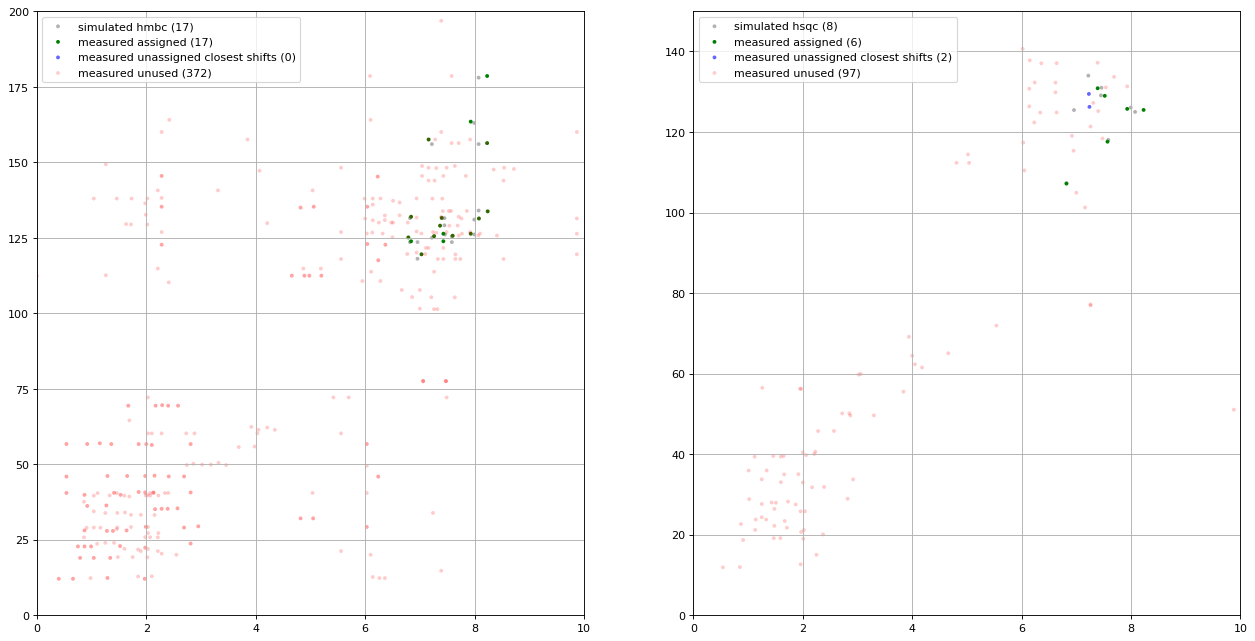

In [22]:
target = menu.value
Image(filename=data_project+target+'.png')